<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
dataset_x = np.linspace(-1, 1, 101)
print(f'dataset_x.shape = {dataset_x.shape}')

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
dataset_y = 2 * dataset_x + np.random.randn(*dataset_x.shape) * 0.33

dataset_x.shape = (101,)


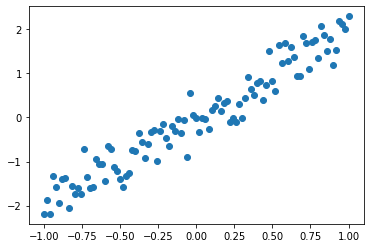

In [26]:
plt.scatter(dataset_x, dataset_y)
plt.show()

In [27]:
dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -2.1820652454100933), (-0.98, -1.885652007948847), (-0.96, -2.1910470816913774), (-0.94, -1.3353385863521439), (-0.92, -1.584479619582055), (-0.9, -1.9333222746507543), (-0.88, -1.3865561955166843), (-0.86, -1.3753835218539119), (-0.84, -2.0586517100804818), (-0.8200000000000001, -1.5658173099852517), (-0.8, -1.7287244354000781), (-0.78, -1.606571903321521), (-0.76, -1.7371128613857176), (-0.74, -0.7158944106930423), (-0.72, -1.3542226810204494), (-0.7, -1.5955991505040752), (-0.6799999999999999, -1.5751163091139881), (-0.6599999999999999, -0.9319508258567596), (-0.64, -1.0517279581566468), (-0.62, -1.0586523856081178), (-0.6, -1.4523211207839886), (-0.5800000000000001, -0.6472448088195556), (-0.56, -0.7149405307495873), (-0.54, -1.1155165245659044), (-0.52, -1.2055983649622666), (-0.5, -1.403065253103915), (-0.48, -1.5728866300746), (-0.45999999999999996, -1.3380299429579292), (-0.43999999999999995, -1.2615597070976827), (-0.42000000000000004, -0.727743109894265), (-

In [28]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])

In [29]:
# model with a single neuron
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.predict(x[:10])

array([[-0.3478843 ],
       [ 0.5218265 ],
       [-0.6957686 ],
       [ 0.0724759 ],
       [ 0.3623795 ],
       [ 0.6377879 ],
       [-0.49283612],
       [ 0.33338913],
       [ 0.05798072],
       [ 0.66677827]], dtype=float32)

In [31]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [32]:
%%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 7.14 s, sys: 126 ms, total: 7.27 s
Wall time: 7.22 s


In [33]:
x = np.linspace(-1, 1, 101)
y = model.predict(x)

In [34]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

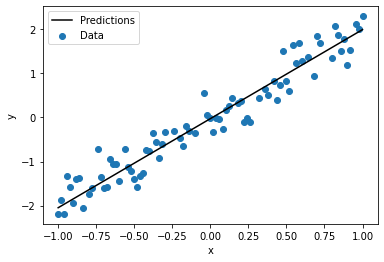

In [35]:
plot_fn(x,y)